In [27]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from math import sqrt

boston_dataset = load_boston()


In [28]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [29]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['MEDV'] = boston_dataset.target 

In [31]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
target = boston['MEDV']
print(target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [75]:
# Функция подсчета MAE(значение абсолютной ошибки)

def MAE(actual, predicted):
    sum_error = 0.0
    if len(actual) == len(predicted):
        sum_error = abs((actual - predicted))
        return int(sum(sum_error)/len(actual))
    else:
        return -1

# Подсчет MAE для двух столбцов с целевой переменной

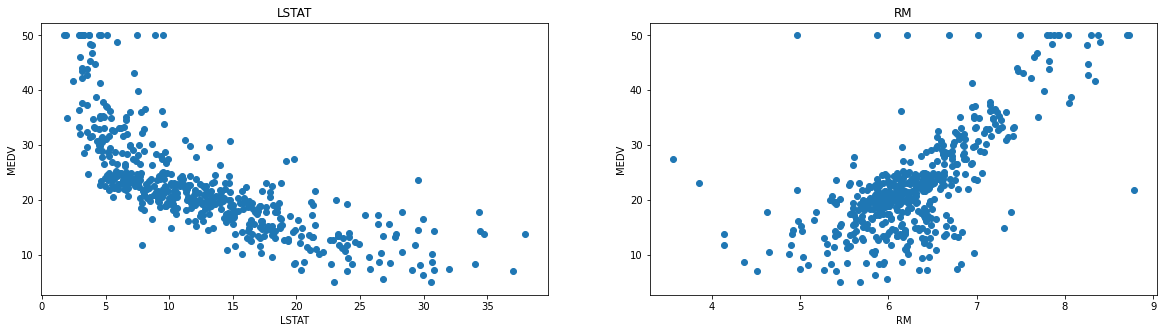

In [35]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [77]:

# Функция для подсчета среднеквадратичной погрешности 
def MSE(actual, predicted):
    sum_error = 0.0
    if len(actual) == len(predicted):
        sum_error = (actual - predicted) * (actual - predicted)
        return int(sum(sum_error)/len(actual))
    
    else:
        return -1


In [78]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

     LSTAT     RM
218  17.92  5.951
132  11.12  6.372
246   9.16  6.108
450  17.44  6.749
17   14.67  5.990
..     ...    ...
359  12.67  6.112
41    4.84  6.770
392  25.68  5.036
224   4.14  8.266
60   13.15  5.741

[404 rows x 2 columns]
     LSTAT     RM
444  23.79  5.854
443  18.85  6.485
2     4.03  7.185
113  17.09  6.092
488  18.06  5.454
..     ...    ...
264   8.10  7.206
54   14.80  5.888
347   6.36  6.516
481   7.74  6.750
120  14.37  5.870

[102 rows x 2 columns]
218    21.5
132    23.0
246    24.3
450    13.4
17     17.5
       ... 
359    22.6
41     26.6
392     9.7
224    44.8
60     18.7
Name: MEDV, Length: 404, dtype: float64
444    10.8
443    15.4
2      34.7
113    18.7
488    15.2
       ... 
264    36.5
54     18.9
347    23.1
481    23.7
120    22.0
Name: MEDV, Length: 102, dtype: float64


In [80]:
# представляет собой сумму квадратов остаточных ошибок модели данных
# представляет собой общую сумму ошибок

def score(actual, predicted):
    if len(actual) == len(predicted):  
        return int((1-MAE(actual, predicted)/np.var(Y_test)))   
    else:
        return 0

In [81]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
print(type(y_train_predict))
print(len(Y_test))
print(len(Y_train))
print(len(y_train_predict))

<class 'numpy.ndarray'>
102
404
404


In [84]:
import math
mse = MSE(Y_train, y_train_predict)
r2 = score(Y_train, y_train_predict)
mae = MAE(Y_train, y_train_predict)
print(r2)
print(mae)
print(sqrt(mse))

0
3
5.291502622129181
